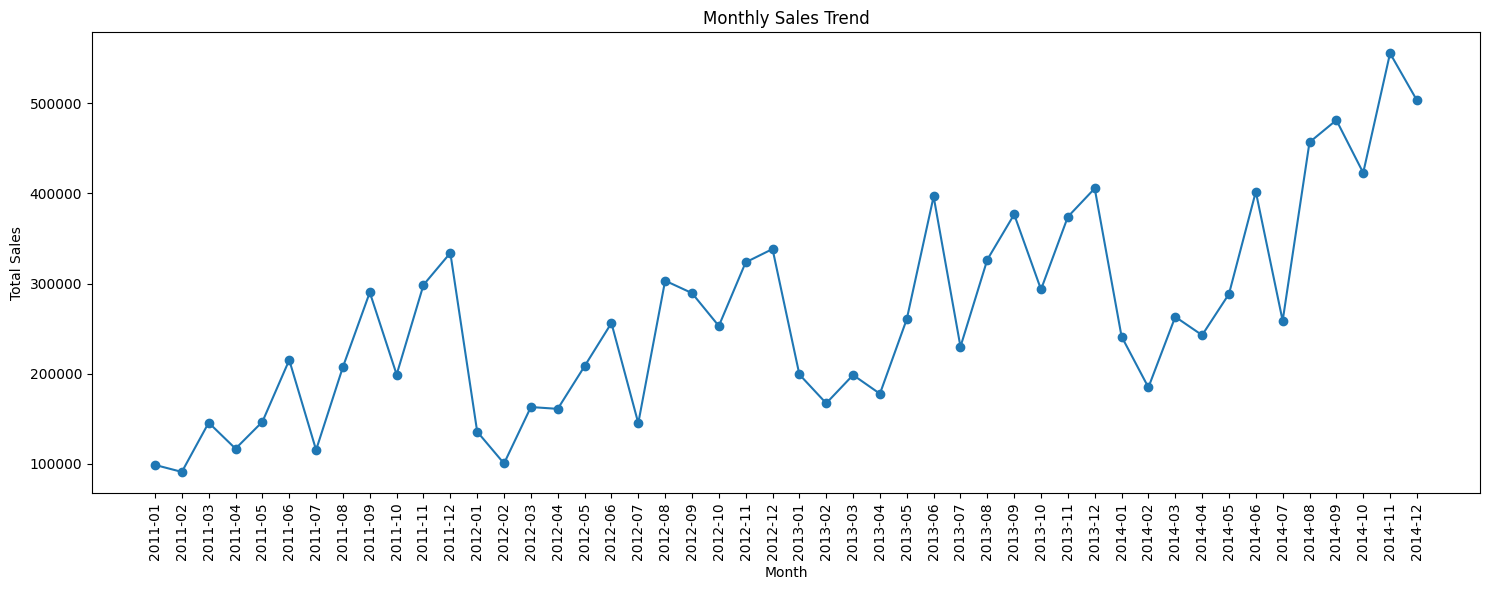

Total Sales: 12642501.909880001
                                        Product Name       Sales  Quantity
0                       Apple Smart Phone, Full Size  86935.7786       171
1                       Cisco Smart Phone, Full Size  76441.5306       139
2                    Motorola Smart Phone, Full Size  73156.3030       134
3                       Nokia Smart Phone, Full Size  71904.5555       147
4              Canon imageCLASS 2200 Advanced Copier  61599.8240        20
5         Hon Executive Leather Armchair, Adjustable  58193.4841       169
6  Office Star Executive Leather Armchair, Adjust...  50661.6840       141
7  Harbour Creations Executive Leather Armchair, ...  50121.5160       142
8                      Samsung Smart Phone, Cordless  48653.4600       108
9                  Nokia Smart Phone, with Caller ID  47877.7857        96


/var/folders/qz/1xj0339x6l396y91h8hbh1cr0000gn/T/ipykernel_3985/2754009517.py:45: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x600 with 0 Axes>

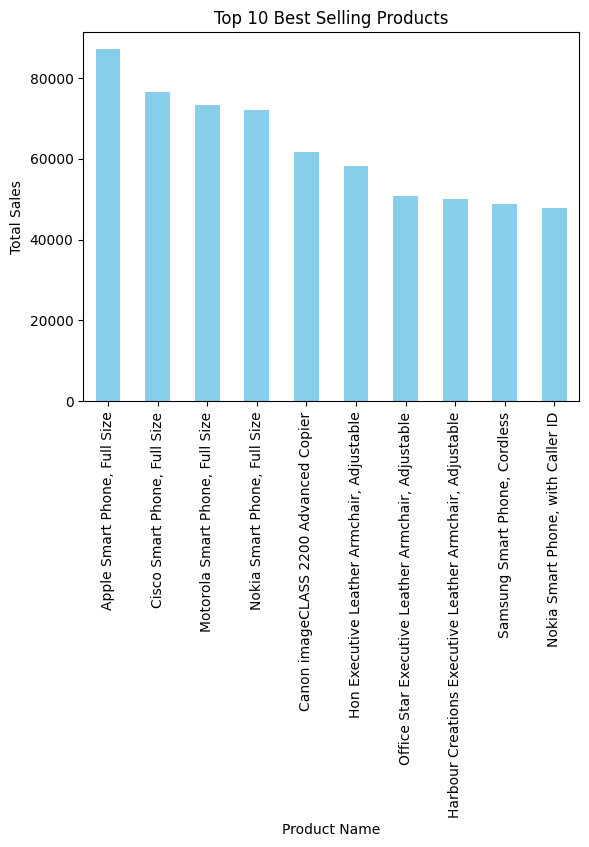

In [8]:
# Importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data from the provided Excel file
df = pd.read_excel("ECOMM DATA.xlsx")

# Removing the duplicate rows in dataset to clean data
df_cleaned = df.drop_duplicates()

# Adding new column 'Order Month' that converts 'Order Date' to a period at monthly frequency
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.to_period('M')

# Grouping data by 'Order Month' and adding up sales to find trends over time
monthly_sales_trend = df_cleaned.groupby('Order Month')['Sales'].sum()

# Plotting the monthly sales trend as line graph
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales_trend.index.astype(str), monthly_sales_trend, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjusting plot to ensure everything fits without overlap
plt.show()

# Calculating total sales by summing up 'Sales' column
total_sales = df_cleaned['Sales'].sum()
print(f"Total Sales: {total_sales}")

# To identify best-selling products by grouping by 'Product Name', summing sales and quantities, and sorting
best_selling_products = df_cleaned.groupby('Product Name').agg({'Sales': 'sum', 'Quantity': 'sum'}).sort_values(by='Sales', ascending=False).reset_index()

# Displaying the top 10 best-selling products
print(best_selling_products.head(10))

# Plotting bar chart of top 10 best-selling products
top10 = best_selling_products.head(10)
plt.figure(figsize=(15, 6))
top10.plot(kind='bar', x='Product Name', y='Sales', legend=False, color='skyblue')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
